In [61]:
#Anthony Loma
#June 16, 2025
#Bio Diversity Portfolio Project

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

pd.options.display.max_rows = 4000

In [257]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

print(observations.head())
print("")
print("Percent of missing data for each category")

obCount = observations['scientific_name'].count()
print((1 - observations.count() / obCount) * 100)


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

Percent of missing data for each category
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64


park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64


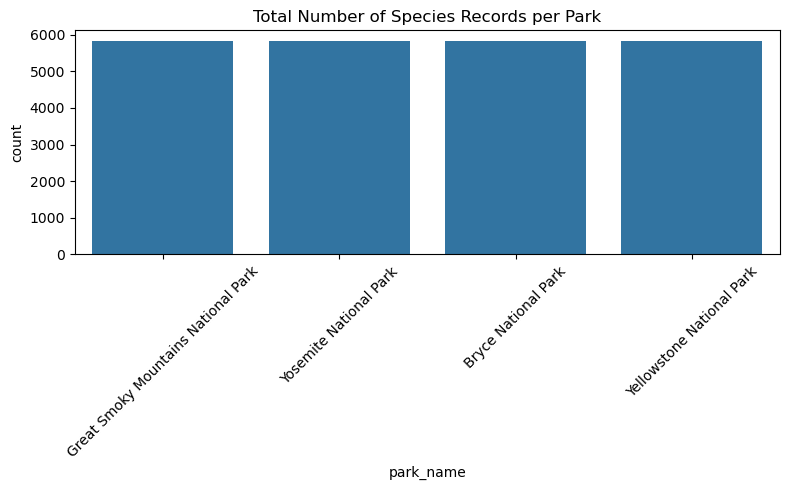

In [329]:
#print(observations.count())
#print(observations.describe())
#print(observations.columns)
#print(observations.value_counts())
#print(observations.count())
# park_counts = observations['park_name'].value_counts().reset_index()
# park_counts.columns = ['park_name', 'count']


# print(ParkDens.head())
# sns.barplot(data=ParkDens, x='park_name', y='counts')
park_counts = observations['park_name'].value_counts().reset_index()
park_counts.columns = ['park_name', 'count']

print(observations['park_name'].value_counts())
# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=park_counts, x='park_name', y='count')
plt.title("Total Number of Species Records per Park")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#print("Percent of missing data for each category")
#speinfCount = species_info['scientific_name'].count()
#print((1 - species_info.count() / speinfCount) * 100)
#print(species_info.head())
#print(species_info.info())
#print(species_info.describe())
#print(species_info.columns)
#print(species_info.value_counts())
#print(species_info.isnull().sum())
#print(observations.dtypes)
#print(species_info.count())

In [335]:

print("The total number of indangered species is", species_info.conservation_status.count())
conservation_status = species_info[species_info.conservation_status.isnull() == False]
#print(conservation_status.head(50))


The total number of indangered species is 191


                             park_name  total_observations
0                  Bryce National Park              633291
1  Great Smoky Mountains National Park              474863
2            Yellowstone National Park             1587641
3               Yosemite National Park              949452


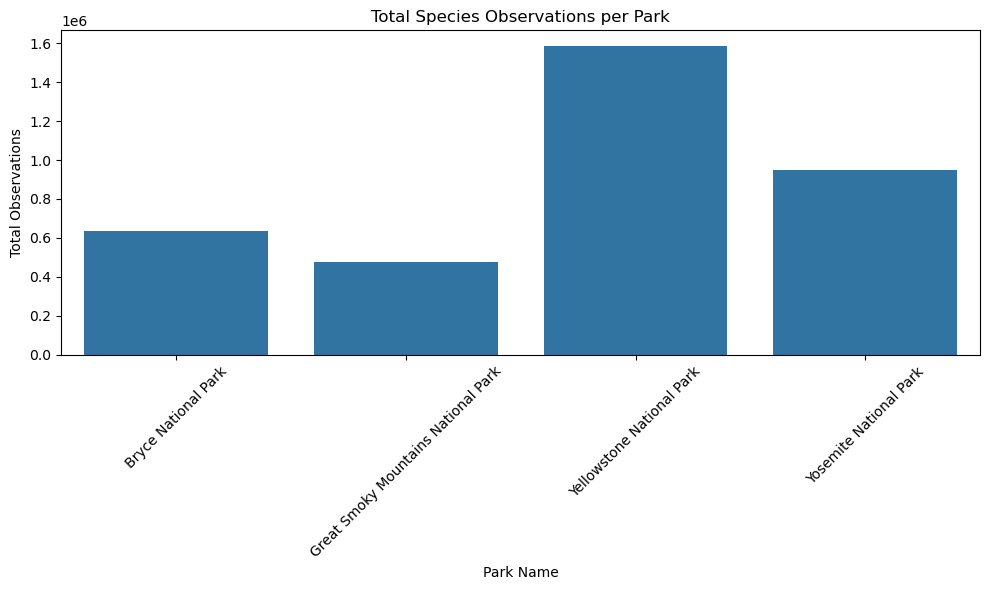

ehy


In [71]:
total_obs = observations.groupby('park_name')['observations'].sum().reset_index()

# Rename column for clarity
total_obs.columns = ['park_name', 'total_observations']

# Preview the result
print(total_obs)
plt.figure(figsize=(10,6))
sns.barplot(data=total_obs, x='park_name', y='total_observations')

plt.title('Total Species Observations per Park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

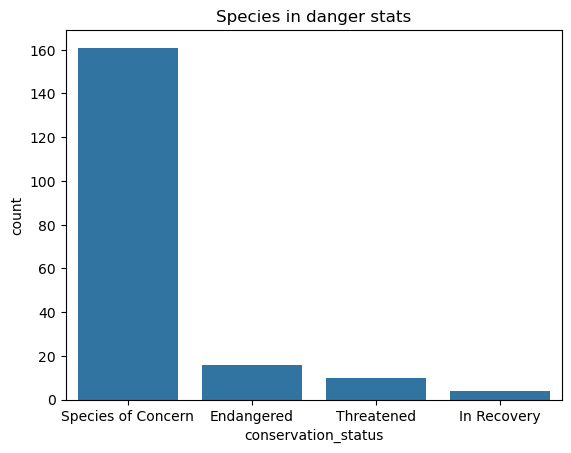

In [287]:
sns.countplot(data=conservation_status, x='conservation_status')
plt.title("Species in danger stats")
plt.show()

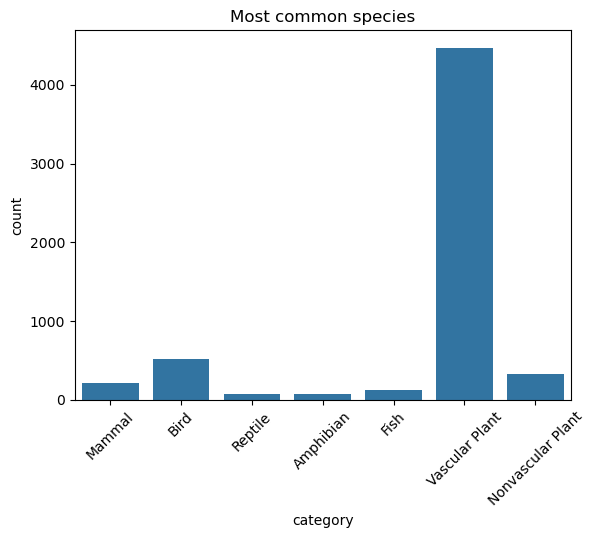

In [337]:
sns.countplot(data=species_info, x='category' )
plt.title("Most common species")
plt.xticks(rotation=45)
plt.show()

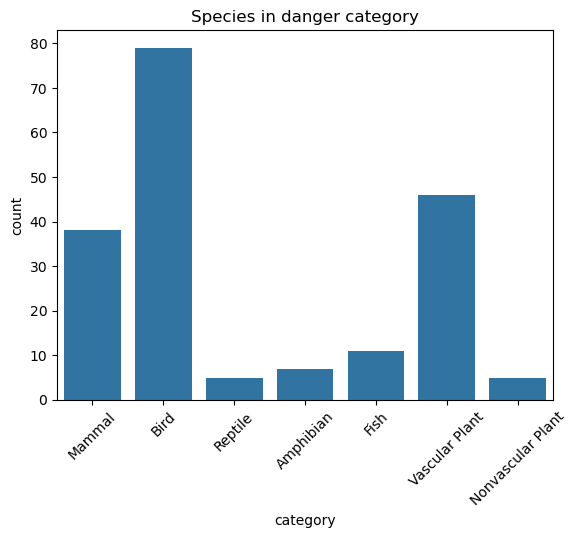

In [45]:
sns.countplot(data=conservation_status, x='category' )
plt.title("Species in danger category")
plt.xticks(rotation=45)
plt.show()

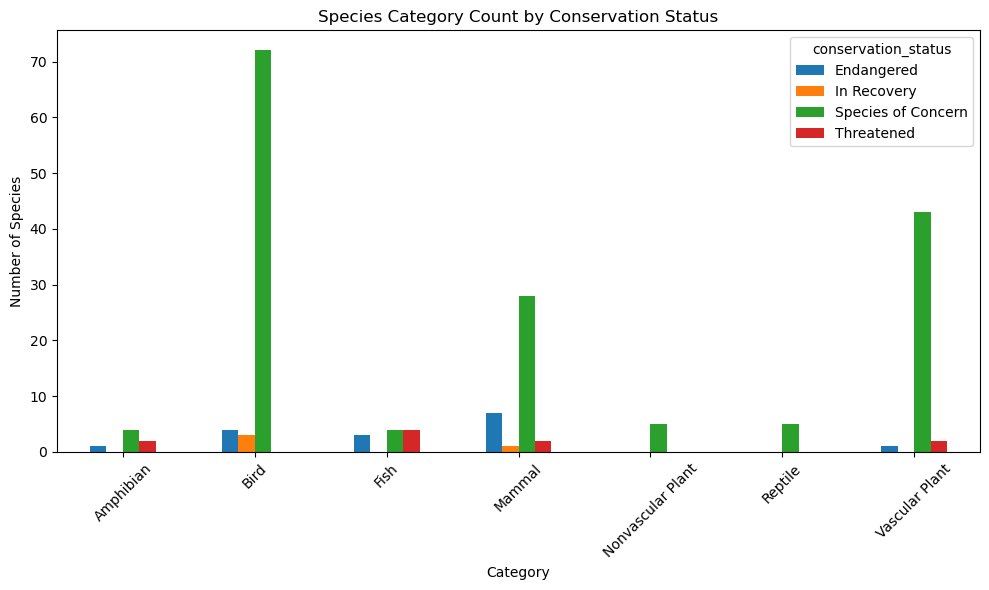

In [341]:
grouped = conservation_status.groupby(['conservation_status', 'category']).size().unstack()

grouped.T.plot(kind='bar', figsize=(10,6))  

plt.title("Species Category Count by Conservation Status")
plt.xlabel("Category")
plt.ylabel("Number of Species")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [361]:

collective = observations.groupby('scientific_name')['observations'].sum().reset_index()

max_obs = collective['observations'].max()

most_common = collective[collective['observations'] == max_obs]
print(most_common)

species_name = most_common['scientific_name'].values[0]
obs_count = most_common['observations'].values[0]

print("The most common specie among all parks is the",species_name, "with a count of", obs_count, "accross all parks.")
    
    

    

            scientific_name  observations
4993  Streptopelia decaocto          1785
The most common specie among all parks is the Streptopelia decaocto with a count of 1785 accross all parks.


In [371]:
species['is_protected'] = species.conservation_status.isnull() == False

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100
category_counts


,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305
